## Analysis of causal model regression on depolarized Bell states
Data simulated either directly from quantum theory or by simulating many IBM-Q circuits.

In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import matplotlib.pyplot as plt

from foqal.utils.io import IO
from projects.causal.visualizations import model_comparison

In [62]:
io = IO.directory(
        # folder="ibmq-simulator_bell-state_local-projections_depolarized-channel",
        folder="entangled-state-data",
        include_date=False, include_id=False, verbose=False,
    )

df = io.load_dataframe("model_summary.txt")

In [63]:
df

,model,m,p,latent_dim,train_loss,test_loss,kl_test_train,k,t,lr,n_steps
0,ClassicalCommonCause,5,0.0,100,0.002485,0.002725,0.000585,0,1.729055,0.15,1500
1,Superdeterminism,5,0.0,100,0.000186,0.000618,0.000585,0,2.690188,0.15,1500
2,Superluminal,5,0.0,100,0.000146,0.000544,0.000585,0,2.087047,0.15,1500
3,QuantumCommonCause,5,0.0,2,0.000224,0.000398,0.000585,0,5.657659,0.15,1500
4,ClassicalCommonCause,5,0.0,100,0.002591,0.002589,0.000676,1,1.915858,0.15,1500
...,...,...,...,...,...,...,...,...,...,...,...
1447,QuantumCommonCause,80,1.0,2,0.000370,0.000386,0.000754,1,3.816017,0.15,1500
1448,ClassicalCommonCause,80,1.0,100,0.000254,0.000495,0.000751,2,1.743361,0.15,1500
1449,Superdeterminism,80,1.0,100,0.000128,0.000618,0.000751,2,2.578260,0.15,1500
1450,Superluminal,80,1.0,100,0.000127,0.000623,0.000751,2,2.352135,0.15,1500


In [64]:
%%capture
fig, axs = model_comparison(df)

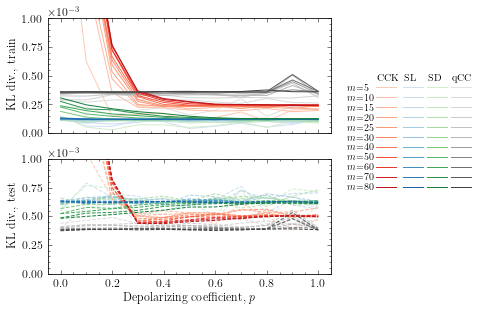

In [65]:
for ax in axs:
    ax.set_yscale("linear")
    ax.set(ylim=[0, 0.001])
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[0].set(ylabel="KL div., train")
axs[1].set(ylabel="KL div., test")
fig

In [67]:
io_save = IO(path=IO.render_path.joinpath("causal-models"))
io_save.save_figure(fig, filename="depolarized-bell-state.pdf")

30/08/2022, 10:05:34 | Saved figure to C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\foqal\renders\causal-models\depolarized-bell-state.pdf successfully.


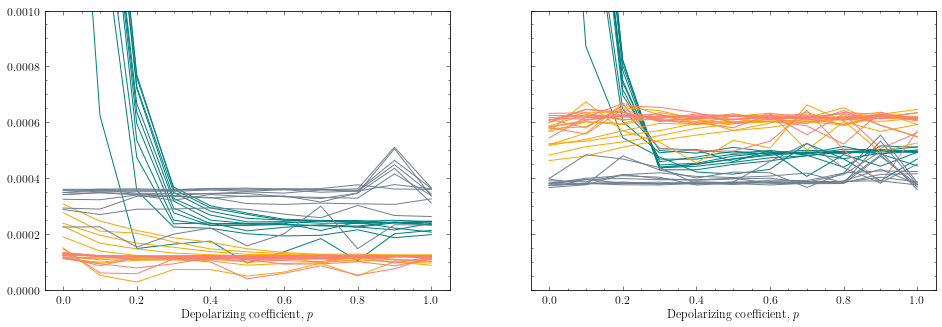

In [15]:
models = df['model'].unique()
colors = ['teal', 'orange', 'salmon', 'slategrey']

ms = df['m'].unique()
ps = df['p'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15, 5], sharey='row')
for model, color in zip(models, colors):
    for m in ms:
        train = []
        test = []
        test_std = []
        for p in ps:
            dfi = df[(df['model']==model) & (df['m'] == m) & (df['p'] == p)]
            train.append(dfi[f'train_loss'].min())
            test.append(dfi[f'test_loss'].min())

        axs[0].plot(ps, train, color=color, label=f"{model}")
        axs[1].plot(ps, test, color=color)

for ax in axs:
    ax.set(xlabel='Depolarizing coefficient, $p$')
    ax.set(ylim=[0, 0.001])